In [247]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [248]:
from my_tools import *

In [3]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [4]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC[S_UNSPENTS].readAll()
BTC[S_NONEMPTY_CLS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC[S_SYNC_PRICES].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calcu

In [10]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: 'log'})
tag_1 = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=1)

Gathered under tag 'NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log'
There is already NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log version of data, stop


In [119]:
bdf1.index

Int64Index([234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
            ...
            456, 457, 458, 459, 460, 461, 462, 463, 464, 465],
           dtype='int64', length=232)

In [120]:
bdf1_l.index

Int64Index([ 820,  821,  822,  823,  824,  825,  826,  827,  828,  829,
            ...
            1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170],
           dtype='int64', length=351)

In [12]:
bdf1 = BTC.allMetrics[tag_1].copy().loc[:465]
bdf1.dropna(inplace=True)

ddf1 = pd.DataFrame()
for col in bdf1:
    ddf1[col] = getDiff(bdf1[col])
ddf1.dropna(inplace=True)

In [33]:
checkStationarities(bdf1)

NacamotoCoefs
prob if stationary: 0.01
prob if NOT stationary: 0.848702640537
activeClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.939284240776
fees
prob if stationary: 0.01
prob if NOT stationary: 0.995542892692
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.59557754103
nonEmptyClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.998566238301
relativeFlowVolumes
prob if stationary: 0.01
prob if NOT stationary: 0.275428858694
synchronizedPrices
prob if stationary: 0.023708470071864354
prob if NOT stationary: 0.557692321325
unspents
prob if stationary: 0.04881795133052954
prob if NOT stationary: 0.000779152587407


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than 

In [34]:
checkStationarities(ddf1)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 7.76260054397e-26
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 0.0
fees
prob if stationary: 0.012075635265005588
prob if NOT stationary: 2.88417555596e-25
ginisOfClustersWealth
prob if stationary: 0.1
prob if NOT stationary: 4.21419464378e-28
nonEmptyClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 7.52819070147e-17
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 9.07389308932e-17
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 1.13280282762e-12
unspents
prob if stationary: 0.1
prob if NOT stationary: 2.89602304261e-13


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

In [35]:
testStationarityTwice(getDiff(ddf1[S_FEES]))

prob if stationary: 0.1
prob if NOT stationary: 6.58249506171e-12


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [44]:
stab_bdf_s

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,times,unspents
234,2,11.369898,24.104681,-3.890163,13.771018,-1.579106,4.762174,2013-05-07 15:26:00,27.345747
235,2,11.408109,24.292005,-3.907224,13.788164,-1.385275,4.667206,2013-05-13 12:37:33,27.274708
236,2,11.191411,24.318808,-3.906197,13.799693,-1.493505,4.763711,2013-05-20 01:27:13,28.124105
237,3,11.126660,24.127877,-3.917906,13.809065,-1.744162,4.808764,2013-05-26 09:31:45,27.524138
238,3,11.079693,24.046583,-3.925035,13.816824,-1.733730,4.902307,2013-06-01 05:23:03,27.251283
239,3,10.937828,23.981499,-3.933336,13.822631,-1.553933,4.860510,2013-06-06 03:34:30,27.686412
240,3,10.908320,23.883714,-3.941435,13.827639,-1.837361,4.801674,2013-06-11 22:09:17,26.746956
241,3,10.731821,23.729631,-3.948042,13.832027,-1.671756,4.663345,2013-06-17 10:09:06,27.324539
242,3,10.915125,24.100135,-3.952458,13.837774,-1.558921,4.609361,2013-06-23 20:25:36,27.793099
243,3,10.890684,23.819048,-3.959512,13.842825,-1.311004,4.675163,2013-06-29 23:10:49,27.229530


In [53]:
stab_bdf = bdf1.copy()
del stab_bdf['times']
stab_bdf_s = prepareToArimax(stab_bdf)

In [109]:
stab_new_bdf = stab_bdf.copy()
stab_new_bdf[S_GINIS] = getDiff(stab_bdf[S_GINIS])
stab_new_bdf.dropna(inplace=True)
stab_new_bdf_s = prepareToArimax(stab_new_bdf)

In [54]:
metrics_list = [col for col in stab_bdf.columns if col != S_REL_FLOWS]
metrics_list_wo_prices = [col for col in stab_bdf.columns if (col != S_REL_FLOWS and col != S_SYNC_PRICES)]

In [115]:
%time stab_new_bdf_bests8 = getMetricsAndPCombinationsScores(stab_new_bdf_s, metrics_list, 8)

p = 0 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ginisOfClustersWealth is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


synchronizedPrices is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_ginisOfClustersWealth is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_synchronizedPrices is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
activeClustersCounts_ginisOfClus

fees_ginisOfClustersWealth_synchronizedPrices is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
fees_ginisOfClustersWealth_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
fees_nonEmptyClustersCounts_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
fees_synchronizedPrices_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a

fees_nonEmptyClustersCounts_synchronizedPrices_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_synchronizedPrices is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClusters

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:

activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

p = 2 is done
unspents is failed
SVD did not converge
fees_ginisOfClustersWealth is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_synchronizedPrices is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nonEmptyClustersCounts_synchronizedPrices is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts_synchronizedPrices is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p = 4 is done
NacamotoCoefs is failed
SVD did not converge
NacamotoCoefs_fees is failed
SVD did not converge
NacamotoCoefs_ginisOfClustersWealth is failed
SVD did not converge
NacamotoCoefs_synchronizedPrices is failed
SVD did not converge
fees_ginisOfClustersWealth is failed
SVD did not converge
ginisOfClustersWealth_nonEmptyClustersCounts is failed
SVD did not converge
nonEmptyClustersCounts_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts is failed
SVD did not converge
NacamotoCoefs_fees_ginisOfClustersWealth is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_fees_nonEmptyClustersCounts is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_nonEmptyClustersCounts_unspents is failed
SVD did not converge
fees_ginisOfClustersWealth_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nonEmptyClustersCounts_synchronizedPrices_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_unspents is failed
SVD did not converge
NacamotoCoefs_fees_synchronizedPrices_unspents is failed
SVD did not converge
NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_unspents is failed
SVD did not converge
activeClustersCounts_fees_nonEmptyClustersCounts_synchronizedPrices is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


fees_ginisOfClustersWealth_synchronizedPrices_unspents is failed
SVD did not converge
fees_nonEmptyClustersCounts_synchronizedPrices_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts_synchronizedPrices is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

p = 5 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_fees is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_nonEmptyClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


activeClustersCounts_fees_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ginisOfClustersWealth_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

fees_nonEmptyClustersCounts_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

p = 6 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
activeClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ginisOfClustersWealth_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
ginisOfClustersWealth_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_activeClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_nonEmptyClustersCounts_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


activeClustersCounts_fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fees_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nonEmptyClustersCounts_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_fees_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_nonEmptyClustersCounts_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
activeClustersCounts_fees_ginisOfClustersWealth_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_fees_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_synchronizedPrices_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist

p = 8 is done
CPU times: user 3h 36min 37s, sys: 6h 32min 9s, total: 10h 8min 46s
Wall time: 1h 53min 15s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [117]:
%time stab_new_bdf_wop_bests8 = getMetricsAndPCombinationsScores(stab_new_bdf_s, metrics_list_wo_prices, 8)

p = 0 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ginisOfClustersWealth is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_ginisOfClustersWealth is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
activeClustersCounts_ginisOfClustersWealth is failed
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
activeClustersCounts_nonEmptyClustersCounts is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params

NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
Nacamot

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  

activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p = 2 is done
unspents is failed
SVD did not converge
fees_ginisOfClustersWealth is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
p = 4 is done
NacamotoCoefs is failed
SVD did not converge
NacamotoCoefs_fees is failed
SVD did not converge
NacamotoCoefs_ginisOfClustersWealth is failed
SVD did not converge
fees_ginisOfClustersWealth is failed
SVD did not converge
ginisOfClustersWealth_nonEmptyClustersCounts is failed
SVD did not converge
nonEmptyClustersCounts_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts is failed
SVD did not converge
NacamotoCoefs_fees_ginisOfClustersWealth is failed
SVD did not converge
activeClustersCounts_fees_nonEmptyClustersCounts is failed
SVD did not converge
activeClustersCounts_nonEmptyClustersCounts_unspents is failed
SVD did not converge
fees_ginisOfClustersWealth_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_fees_unspents is failed
SVD did not converge
NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
SVD did not converge
activeClustersCounts_fees_ginisOfClustersWealth_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_unspents is failed
SVD did not converge
NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_fees is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_nonEmptyClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


activeClustersCounts_fees_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

p = 6 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


activeClustersCounts_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
activeClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ginisOfClustersWealth_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
ginisOfClustersWealth_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_activeClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


activeClustersCounts_fees_ginisOfClustersWealth is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts_unspents is failed
On entry to DLASCL parameter number 4 had an illegal value
NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts is failed
On entry to DLASCL parameter number 4 had an illegal value


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist

p = 8 is done
CPU times: user 1h 35min 32s, sys: 2h 53min 36s, total: 4h 29min 8s
Wall time: 49min 40s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [118]:
stab_new_bdf_wop_bests8

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.2201551644888125),
 '1': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.21094140712013679),
 '2': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_unspents',
  0.20800722480521933),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.20802559135658813),
 '4': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_unspents',
  0.20810922769263968),
 '5': ('NacamotoCoefs_activeClustersCounts_fees_nonEmptyClustersCounts',
  0.20794267860438451),
 '6': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth',
  0.20971240008470229),
 '7': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.2107969319681271),
 '8': ('NacamotoCoefs_fees_nonEmptyClustersCounts_unspents',
  0.20607083348150049)}

In [95]:
todaYamamoto(getDiff(ddf1[S_GINIS]), ddf1[S_REL_FLOWS][1:], verbose=3 )

maxlags is 6
lag is 6
x resids acorr p: 0.999993614481
y resids acorr 0.937140418175
x does NOT cause y: 0.021
y does NOT cause x: 0.727


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0.021000000000000001, 0.72699999999999998)

In [98]:
model = VAR(ddf1[[S_FEES,S_REL_FLOWS]])
model.select_order().selected_orders

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


{'aic': 8, 'bic': 1, 'fpe': 8, 'hqic': 4}

In [99]:
model.fit(8).is_stable()

True

In [107]:
ARIMAX_result(bdf1[[S_UNSPENTS, S_FEES,S_REL_FLOWS]], S_REL_FLOWS, arima_order=(8, 1, 1))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


0.21264644044190101

In [108]:
ARIMAX_result(bdf1[[S_UNSPENTS, S_FEES,S_REL_FLOWS]], S_REL_FLOWS, arima_order=(8, 1, 1))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


0.21264644044190101

In [80]:
statsmodels.tsa.stattools.grangercausalitytests(ddf1[[S_GINIS,S_REL_FLOWS]], maxlag=0, verbose=False)

{}

In [56]:
stab_bdf_bests

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22015053386195554),
 '1': ('NacamotoCoefs_ginisOfClustersWealth_unspents', 0.2069718569487283),
 '2': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth',
  0.20559356772904505),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_synchronizedPrices',
  0.20565071977502855),
 '4': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth',
  0.20557023748380188),
 '5': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth',
  0.20523090191610072)}

In [116]:
stab_new_bdf_bests8

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22015095270724694),
 '1': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.20723197652640166),
 '2': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.20659646411484922),
 '3': ('NacamotoCoefs_fees_ginisOfClustersWealth_synchronizedPrices',
  0.20665456633650323),
 '4': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_synchronizedPrices',
  0.20692791096926855),
 '5': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.20639630631320774),
 '6': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth',
  0.20971240008470229),
 '7': ('activeClustersCounts_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.21068885765032527),
 '8': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCoun

In [106]:
todaYamamotoWithCol(ddf21, S_REL_FLOWS, verbose=2)

y=NacamotoCoefs,   x=relativeFlowVolumes
lag is 3
x resids acorr p: 0.917801105795
y resids acorr 0.990601155527
x does NOT cause y: 0.895
y does NOT cause x: 0.051
-------------------------------
y=activeClustersCounts,   x=relativeFlowVolumes
lag is 2
x resids acorr p: 0.800332072894
y resids acorr 0.89960290627
x does NOT cause y: 0.622
y does NOT cause x: 0.559
-------------------------------
y=fees,   x=relativeFlowVolumes
lag is 8
x resids acorr p: 0.999932183581
y resids acorr 0.997653688821
x does NOT cause y: 0.003
y does NOT cause x: 0.004
-------------------------------
y=ginisOfClustersWealth,   x=relativeFlowVolumes
lag is 6
x resids acorr p: 0.999993614481
y resids acorr 0.937140418175


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.021
y does NOT cause x: 0.727
-------------------------------
y=nonEmptyClustersCounts,   x=relativeFlowVolumes
lag is 1
x resids acorr p: 0.804186823712
y resids acorr 0.443506285946
x does NOT cause y: 0.353
y does NOT cause x: 0.063
-------------------------------
y=synchronizedPrices,   x=relativeFlowVolumes
lag is 4
x resids acorr p: 0.986285583741
y resids acorr 0.999934051561
x does NOT cause y: 0.222
y does NOT cause x: 0.074
-------------------------------
y=unspents,   x=relativeFlowVolumes
lag is 8
x resids acorr p: 0.999936566395
y resids acorr 0.999945093748
x does NOT cause y: 0.001
y does NOT cause x: 0.527
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [272]:
%time new_bdf_wop_bests = getMetricsAndPCombinationsScores(new_bdf_s, metrics_list_wo_prices, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 0 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 1 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 5 is done
CPU times: user 3min 51s, sys: 33.3 s, total: 4min 24s
Wall time: 3min 40s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [271]:
new_bdf_bests

{'0': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.23688530824720577),
 '1': ('NacamotoCoefs_fees_nonEmptyClustersCounts_synchronizedPrices',
  0.22286819159815072),
 '2': ('NacamotoCoefs_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22176919918012045),
 '3': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.2215196059247273),
 '4': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.22156277390244625),
 '5': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22120443328740946)}

In [273]:
new_bdf_wop_bests

{'0': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.23707440126501131),
 '1': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.22390495197441934),
 '2': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22277041792589294),
 '3': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22180710042898819),
 '4': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22222975551776694),
 '5': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.22201840004548137)}

In [ ]:
NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices

277

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 11
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


step 18
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid v

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 158
SVD did not converge
step 196
SVD did not converge


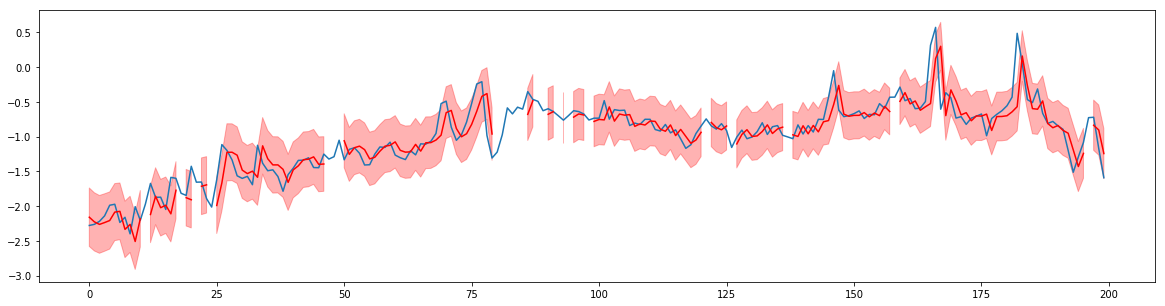

In [277]:
# NEW
predictions_confs_new_bdf_s = ARIMAX_WalkForwardValidation(new_bdf_s[[S_NCS, S_NONEMPTY_CLS, S_SYNC_PRICES, S_GINIS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -200, (3, 1, 1))

In [288]:
new_bdf_s[S_REL_FLOWS].loc[234:235]

234   -1.579106
235   -1.385275
Name: relativeFlowVolumes, dtype: float64

In [ ]:
new_bdf_s[S_REL_FLOWS].il

In [286]:
new_bdf_s[S_REL_FLOWS][:1]

234   -1.579106
Name: relativeFlowVolumes, dtype: float64

In [227]:
def drawForecastResults(reals, predictions_confs, figsize=(15, 6), times=None, begin=None, end=None):
    f = plt.figure(figsize=figsize)
    ax = f.subplots()
    
    
    index = predictions_confs['index']
    ewma_prediction = pd.ewma(reals.loc[index[0]:index[-1]].shift(), halflife=1)
    if not times is None:
        x = [times[i] for i in index]
    else:
        x = index
    ax.grid()
    ax.plot(x, reals.loc[index[0]:index[-1]], label='истинное')
    ax.plot(x, predictions_confs['predictions'], color='red', label='ARIMAX')
    ax.plot(x, ewma_prediction, color='green', label='эксп. взв. сколь. среднее', linestyle=':')
    ax.legend()
    if times is None:
        ax.set_xlabel('Период')
    ax.set_ylabel('Лог. относительного валютного оборота')
    ax.fill_between(x, y1=predictions_confs['conf_1'], y2=predictions_confs['conf_2'], color='red', alpha=0.2)
    f.show()
    return f

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


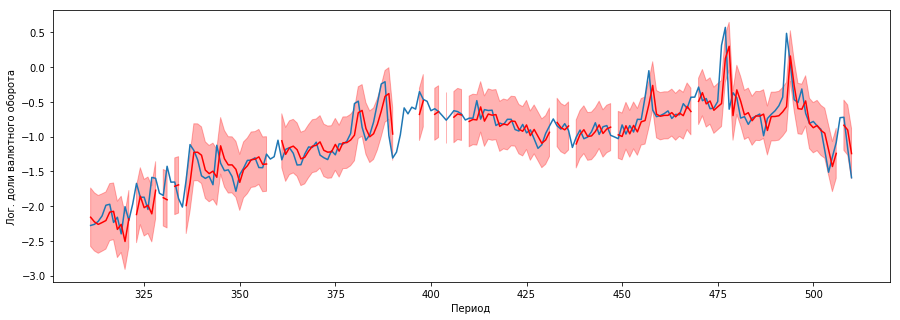

In [296]:
_ = drawForecastResults(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


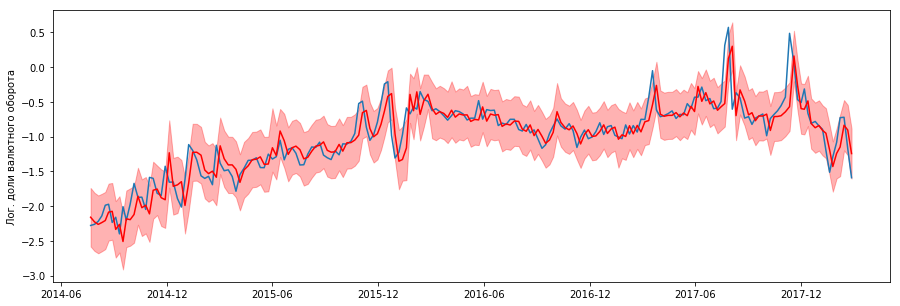

In [375]:
_b200 = drawForecastResults(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s, times=BTC.times)

In [ ]:
_b200

In [373]:
saveJson(predictions_confs_new_bdf_s, 'predictions_confs_new_bdf_s_200_LOG')

TypeError: Int64Index([311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
            ...
            501, 502, 503, 504, 505, 506, 507, 508, 509, 510],
           dtype='int64', length=200) is not JSON serializable

In [376]:
_b200.savefig('BTC_new_bdf_s_200_LOG.png')

In [324]:
predictions_confs_new_bdf_fixed['predictions'][21] == np.array([np.nan], dtype=np.float64)

array([False], dtype=bool)

In [323]:
type(predictions_confs_new_bdf_fixed['predictions'][21][0])

numpy.float64

In [326]:
np.isnan(predictions_confs_new_bdf_fixed['predictions'][21][0])

True

In [357]:
rmses = [0.12494, 0.12502,0.13433,0.13552,0.13398,0.14654]


In [359]:
rmse_coef = 0.22180710042898819 / rmses[0]

In [360]:
new_rmses = [r * rmse_coef for r in rmses]

In [361]:
new_rmses

[0.22180710042898819,
 0.22194912514512646,
 0.23847725148572102,
 0.2405898691382782,
 0.23785589335261592,
 0.26015377378632887]

In [162]:
def fillNonePredictions(reals, predictions_confs):
    index = predictions_confs['index']
    reals = reals.loc[index[0]:index[-1]].values
    fixed_predictions = predictions_confs['predictions'].copy()
    fixed_confs_1 = predictions_confs['conf_1'].copy()
    fixed_confs_2 = predictions_confs['conf_2'].copy()
    
    for i in range(1, len(reals)):
        print(fixed_predictions[i])
        if np.isnan(fixed_predictions[i]):
            fixed_predictions[i] = reals[i-1] * (1 + np.random.randn(1)/10)
            #print(fixed_predictions[i])
            multy = (1 + np.random.randn(1)/10)
            print(multy)
            conf_int = prev_conf_int * multy
            fixed_confs_1[i] = fixed_predictions[i] + conf_int
            fixed_confs_2[i] = fixed_predictions[i] - conf_int
        else:
            prev_conf_int = fixed_confs_1[i] - fixed_predictions[i]
    return {'index': predictions_confs['index'],
            'predictions': fixed_predictions,
            'conf_1': fixed_confs_1,
            'conf_2': fixed_confs_2}

In [351]:
predictions_confs_new_bdf_fixed = fillNonePredictions(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 11
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


step 18
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid v

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 158
SVD did not converge
step 196
SVD did not converge


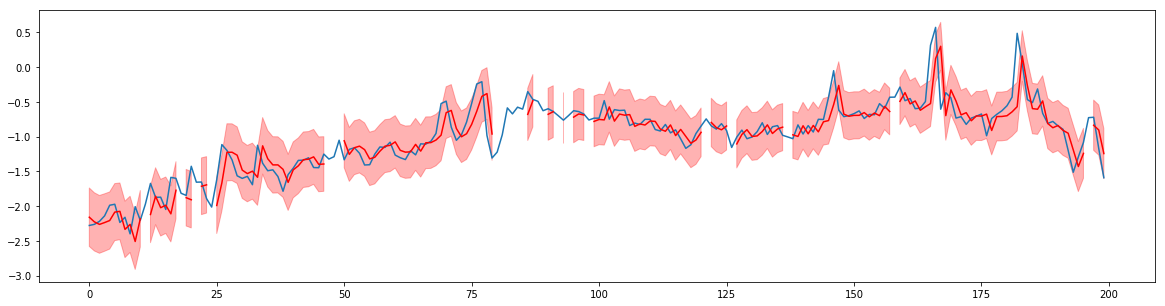

In [277]:
# NEW
predictions_confs_new_bdf_s = ARIMAX_WalkForwardValidation(new_bdf_s[[S_NCS, S_NONEMPTY_CLS, S_SYNC_PRICES, S_GINIS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -200, (3, 1, 1))

In [ ]:
#Q_CORR

In [87]:
def todaYamamotoDf(df, verbose=0):
    ty_df = df.corr().copy()
    for col in ty_df.columns:
        for ind in ty_df.index:
            if ind == col:
                ty_df[col][ind] = None
                continue
            if verbose >= 1:
                print('y={},   x={}'.format(col, ind))
            ty_df[col][ind], ty_df[ind][col] = todaYamamoto(df[col], df[ind], verbose=verbose)
            if verbose >= 1:
                print('-------------------------------')
    return ty_df

In [393]:
import scipy
def pearsonDf(df, verbose=0, signs=3):
    coef_df = df.corr().copy()
    p_df = df.corr().copy()
    for col in coef_df.columns:
        for ind in coef_df.index:
            if ind == col:
                coef_df[col][ind] = None
                p_df[col][ind] = None
                continue
            if verbose >= 1:
                print('y={},   x={}'.format(col, ind))
                
            coef, p = scipy.stats.pearsonr(df[col], df[ind])
            coef_df[col][ind], coef_df[ind][col] = round(coef,signs), round(coef,signs)
            p_df[col][ind], p_df[ind][col] = p, p
            if verbose >= 1:
                print('-------------------------------')
    return coef_df, p_df

In [ ]:
#Q_FINAL!!!!!!!!

In [244]:
todaYamamotoDf(ddf1_l)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.602,0.017,0.836,0.557,0.059,0.372,0.808
activeClustersCounts,0.427,NaN,0.593,0.000,0.010,0.066,0.226,0.609
fees,0.836,0.037,NaN,0.343,0.002,0.164,0.008,0.076
ginisOfClustersWealth,0.703,0.742,0.012,NaN,0.516,0.129,0.228,0.049
nonEmptyClustersCounts,0.744,0.122,0.012,0.000,NaN,0.438,0.538,0.779
relativeFlowVolumes,0.230,0.000,0.374,0.088,0.539,NaN,0.399,0.840
synchronizedPrices,0.389,0.582,0.417,0.892,0.659,0.038,NaN,0.302
unspents,0.028,0.402,0.546,0.814,0.877,0.025,0.816,NaN


In [243]:
todaYamamotoDf(ddf1)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

lag was 0! Columns: ginisOfClustersWealth relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

lag was 0! Columns: relativeFlowVolumes ginisOfClustersWealth


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.451,0.239,0.407,0.833,0.038,0.462,0.154
activeClustersCounts,0.805,NaN,0.031,0.432,0.104,0.562,0.000,0.248
fees,0.535,0.239,NaN,0.965,0.843,0.004,0.343,0.054
ginisOfClustersWealth,0.849,0.058,0.992,NaN,0.019,0.835,0.121,0.004
nonEmptyClustersCounts,0.702,0.063,0.120,0.388,NaN,0.465,0.757,0.284
relativeFlowVolumes,0.892,0.729,0.003,0.370,0.817,NaN,0.197,0.000
synchronizedPrices,0.308,0.019,0.052,0.949,0.682,0.082,NaN,0.720
unspents,0.847,0.109,0.046,0.070,0.005,0.525,0.172,NaN


In [254]:
todaYamamotoWithCol(ddf1_l, S_REL_FLOWS, verbose=2)

y=NacamotoCoefs,   x=relativeFlowVolumes
lag is 3
x resids acorr p: 0.914275520584
y resids acorr 0.989453306934
x does NOT cause y: 0.892
y does NOT cause x: 0.038
-------------------------------
y=activeClustersCounts,   x=relativeFlowVolumes
lag is 2
x resids acorr p: 0.801096200008
y resids acorr 0.948141587441
x does NOT cause y: 0.729
y does NOT cause x: 0.562
-------------------------------
y=fees,   x=relativeFlowVolumes
lag is 8
x resids acorr p: 0.999917819224
y resids acorr 0.995181036116
x does NOT cause y: 0.003
y does NOT cause x: 0.004
-------------------------------
y=ginisOfClustersWealth,   x=relativeFlowVolumes
lag is 1
x resids acorr p: 0.826662152746
y resids acorr 0.955727495644
x does NOT cause y: 0.37
y does NOT cause x: 0.835
-------------------------------
y=nonEmptyClustersCounts,   x=relativeFlowVolumes
lag is 4
x resids acorr p: 0.979541588389
y resids acorr 0.999810323609


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

x does NOT cause y: 0.817
y does NOT cause x: 0.465
-------------------------------
y=synchronizedPrices,   x=relativeFlowVolumes
lag is 4
x resids acorr p: 0.984376837811
y resids acorr 0.999862483925
x does NOT cause y: 0.197
y does NOT cause x: 0.082
-------------------------------
y=unspents,   x=relativeFlowVolumes
lag is 8
x resids acorr p: 0.999934752751
y resids acorr 0.999952034624
x does NOT cause y: 0.0
y does NOT cause x: 0.525
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
todaYamamot

In [417]:
r_xy, r_yz, r_xz

(-0.9297274400363873, 0.97559725591125046, -0.90543505718016426)

In [420]:
def partialCorr(r_xy, r_yz, r_xz):
    return (r_xy - r_xz * r_yz) / np.sqrt(1 - r_xz**2) / np.sqrt(1 - r_yz**2)

In [18]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 1421537 blocks
Got 9312234 clusters


In [19]:
LTC[S_GINIS].readAll()
LTC[S_REL_FLOWS].readAll()
LTC[S_FEES].readAll()
LTC[S_NCS].readAll()
LTC[S_UNSPENTS].readAll()
LTC[S_NONEMPTY_CLS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC[S_SYNC_PRICES].readAll()
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
  Got 'int1000b_relativeFlowVolumes_par_cutTop1.5.json', key is 'par_cutTop1.5'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_unspents'...
  Go

In [20]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log', S_SYNC_PRICES: 'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS: 'log'})
tag_mean = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=5)

Gathered under tag 'NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log'


/home/ubuntu/thesis_work/my_tools.py:1169: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


In [21]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: 'log'})

Gathered under tag 'NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log'
There is already NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log version of data, stop


In [24]:
bdf1_l = LTC.allMetrics[tag_l].copy().loc[820:1170]
bdf1_l.dropna(inplace=True)

ddf1_l = pd.DataFrame()
for col in bdf1_l:
    ddf1_l[col] = getDiff(bdf1_l[col])
ddf1_l.dropna(inplace=True)

ddf21_l = ddf1_l.copy()
ddf21_l[S_GINIS] = getDiff(ddf1_l[S_GINIS])
ddf21_l[S_NONEMPTY_CLS] = getDiff(ddf1_l[S_NONEMPTY_CLS])
ddf21_l.dropna(inplace=True)

In [36]:
checkStationarities(bdf1_l)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 0.370702112281
activeClustersCounts
prob if stationary: 0.046270361552427426
prob if NOT stationary: 0.804438364326
fees
prob if stationary: 0.01
prob if NOT stationary: 0.154808052359
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.485466142373
nonEmptyClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.92986128452
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 0.00292673555169
synchronizedPrices
prob if stationary: 0.01
prob if NOT stationary: 0.0263429053233
unspents
prob if stationary: 0.040481116353552324
prob if NOT stationary: 2.19033530954e-07


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

In [37]:
checkStationarities(ddf1_l)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 4.18096501108e-06
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 4.18241579548e-14
fees
prob if stationary: 0.1
prob if NOT stationary: 7.68458963524e-27
ginisOfClustersWealth
prob if stationary: 0.07609164015932376
prob if NOT stationary: 0.00145591658905
nonEmptyClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 0.146113116602
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 2.34099194015e-15
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 0.0
unspents
prob if stationary: 0.1
prob if NOT stationary: 9.6091251284e-12


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

In [38]:
testStationarityTwice(getDiff(ddf1_l[S_GINIS]))

prob if stationary: 0.1
prob if NOT stationary: 1.62511362749e-12


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [240]:
todaYamamotoDf(ddf1)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

lag was 0! Columns: ginisOfClustersWealth relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

lag was 0! Columns: relativeFlowVolumes ginisOfClustersWealth


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.451,0.239,0.407,0.833,0.038,0.462,0.154
activeClustersCounts,0.805,NaN,0.031,0.432,0.104,0.562,0.000,0.248
fees,0.535,0.239,NaN,0.965,0.843,0.004,0.343,0.054
ginisOfClustersWealth,0.849,0.058,0.992,NaN,0.019,0.835,0.121,0.004
nonEmptyClustersCounts,0.702,0.063,0.120,0.388,NaN,0.465,0.757,0.284
relativeFlowVolumes,0.892,0.729,0.003,0.370,0.817,NaN,0.197,0.000
synchronizedPrices,0.308,0.019,0.052,0.949,0.682,0.082,NaN,0.720
unspents,0.847,0.109,0.046,0.070,0.005,0.525,0.172,NaN


In [241]:
todaYamamotoDf(ddf1_l)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.602,0.017,0.836,0.557,0.059,0.372,0.808
activeClustersCounts,0.427,NaN,0.593,0.000,0.010,0.066,0.226,0.609
fees,0.836,0.037,NaN,0.343,0.002,0.164,0.008,0.076
ginisOfClustersWealth,0.703,0.742,0.012,NaN,0.516,0.129,0.228,0.049
nonEmptyClustersCounts,0.744,0.122,0.012,0.000,NaN,0.438,0.538,0.779
relativeFlowVolumes,0.230,0.000,0.374,0.088,0.539,NaN,0.399,0.840
synchronizedPrices,0.389,0.582,0.417,0.892,0.659,0.038,NaN,0.302
unspents,0.028,0.402,0.546,0.814,0.877,0.025,0.816,NaN


In [89]:
todaYamamotoDf(bdf)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.145,0.013,0.535,0.335,0.342,0.103,0.388
activeClustersCounts,0.140,NaN,0.000,0.442,0.583,0.014,0.003,0.742
fees,0.631,0.005,NaN,0.058,0.472,0.236,0.019,0.085
ginisOfClustersWealth,0.545,0.000,0.187,NaN,0.454,0.056,0.059,0.000
nonEmptyClustersCounts,0.906,0.553,0.021,0.285,NaN,0.421,0.320,0.165
relativeFlowVolumes,0.423,0.003,0.243,0.033,0.560,NaN,0.005,0.003
synchronizedPrices,0.206,0.056,0.653,0.085,0.336,0.190,NaN,0.032
unspents,0.637,0.992,0.413,0.419,0.036,0.512,0.090,NaN


In [96]:
todaYamamotoDf(ddf2)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.264,0.079,0.482,0.148,0.584,0.153,0.489
activeClustersCounts,0.076,NaN,0.000,0.865,0.837,0.009,0.010,0.972
fees,0.539,0.005,NaN,0.827,0.353,0.254,0.451,0.322
ginisOfClustersWealth,0.646,0.004,0.552,NaN,0.431,0.156,0.398,0.000
nonEmptyClustersCounts,0.769,0.844,0.576,0.254,NaN,0.298,0.372,0.710
relativeFlowVolumes,0.431,0.004,0.230,0.157,0.296,NaN,0.013,0.004
synchronizedPrices,0.156,0.034,0.575,0.088,0.255,0.214,NaN,0.065
unspents,0.491,0.987,0.761,0.259,0.024,0.557,0.478,NaN


In [191]:
todaYamamotoWithCol(bdf, S_FEES, verbose=2)

y=NacamotoCoefs,   x=fees
lag is 12
x resids acorr p: 0.991184214534
y resids acorr 0.999771644919
x does NOT cause y: 0.631
y does NOT cause x: 0.013
-------------------------------
y=activeClustersCounts,   x=fees
lag is 13
x resids acorr p: 0.997820726582
y resids acorr 0.998942768266


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.005
y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=fees
lag is 12
x resids acorr p: 0.988666290258
y resids acorr 0.997802634336
x does NOT cause y: 0.058
y does NOT cause x: 0.187
-------------------------------
y=nonEmptyClustersCounts,   x=fees
lag is 14
x resids acorr p: 0.992623201736
y resids acorr 0.949272457843


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.472
y does NOT cause x: 0.021
-------------------------------
y=relativeFlowVolumes,   x=fees
lag is 14
x resids acorr p: 0.992662155706
y resids acorr 0.998025417865
x does NOT cause y: 0.236
y does NOT cause x: 0.243
-------------------------------
y=synchronizedPrices,   x=fees
lag is 14
x resids acorr p: 0.972249169573
y resids acorr 0.998941757597


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.019
y does NOT cause x: 0.653
-------------------------------
y=unspents,   x=fees
lag is 14
x resids acorr p: 0.988118389973
y resids acorr 0.999404269679
x does NOT cause y: 0.085
y does NOT cause x: 0.413
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [239]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def todaYamamoto(y, x, maxlags=None, verbose=0):
    xy = pd.DataFrame({'x': x, 'y': y})
    model = VAR(xy)
    if maxlags is None:
        maxlags = model.select_order().selected_orders['aic']
        if verbose >= 2:
            print('maxlags is', maxlags)
    model_fit = model.fit(maxlags=maxlags)
    lag = model_fit.k_ar
    if verbose >= 1:
        print('lag is', lag)
    
    print('x resids acorr p:', acorr_ljungbox(model_fit.resid['x'], lag)[1].max())
    print('y resids acorr', acorr_ljungbox(model_fit.resid['y'], lag)[1].max())
    
    print('x does NOT cause y:', grangerCasualityNp(y, x, lag)[lag - 1][0])
    print('y does NOT cause x:', grangerCasualityNp(x, y, lag)[lag - 1][0])

In [177]:
todaYamamoto(bdf[S_REL_FLOWS], bdf[S_GINIS])

maxlags is 12
lag is 12
x resids acorr p: 0.997809460852
y resids acorr 0.997491275038
x does NOT cause y: 0.056
y does NOT cause x: 0.033


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [243]:
def todaYamamotoWithCol(df, the_col, verbose=0):
    for a_col in df.columns:
        if not a_col in (the_col, 'times'):
            print('y={},   x={}'.format(a_col, the_col))
            todaYamamoto(df[a_col], df[the_col], verbose=verbose)
            print('-------------------------------')

In [244]:
todaYamamotoWithCol(bdf, S_SYNC_PRICES, verbose=1)

y=NacamotoCoefs,   x=synchronizedPrices
lag is 12
x resids acorr p: 0.987306883676
y resids acorr 0.999700306021
x does NOT cause y: 0.206
y does NOT cause x: 0.103
-------------------------------
y=activeClustersCounts,   x=synchronizedPrices
lag is 13
x resids acorr p: 0.977401367581
y resids acorr 0.978603033818
x does NOT cause y: 0.056
y does NOT cause x: 0.003
-------------------------------
y=fees,   x=synchronizedPrices


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 14
x resids acorr p: 0.918884327458
y resids acorr 0.937186613336
x does NOT cause y: 0.023
y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=synchronizedPrices
lag is 15
x resids acorr p: 0.999088122388
y resids acorr 0.999620464096
x does NOT cause y: 0.085


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.059
-------------------------------
y=nonEmptyClustersCounts,   x=synchronizedPrices
lag is 14
x resids acorr p: 0.9995335909
y resids acorr 0.932430858996
x does NOT cause y: 0.336
y does NOT cause x: 0.32
-------------------------------
y=relativeFlowVolumes,   x=synchronizedPrices
lag is 15
x resids acorr p: 0.996942224916
y resids acorr 0.997052314423
x does NOT cause y: 0.19


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does 

y does NOT cause x: 0.005
-------------------------------
y=unspents,   x=synchronizedPrices
lag is 12
x resids acorr p: 0.795891804906
y resids acorr 0.932786066414
x does NOT cause y: 0.8
y does NOT cause x: 1.0
-------------------------------


In [190]:
todaYamamotoWithCol(bdf, S_REL_FLOWS)

y=NacamotoCoefs,   x=relativeFlowVolumes
x resids acorr p: 0.996700904484
y resids acorr 0.995625357382
x does NOT cause y: 0.423
y does NOT cause x: 0.342
-------------------------------
y=activeClustersCounts,   x=relativeFlowVolumes
x resids acorr p: 0.993381689253
y resids acorr 0.886886525225
x does NOT cause y: 0.003


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.014
-------------------------------
y=fees,   x=relativeFlowVolumes
x resids acorr p: 0.995022998653
y resids acorr 0.996112076705
x does NOT cause y: 0.117
y does NOT cause x: 0.934
-------------------------------
y=ginisOfClustersWealth,   x=relativeFlowVolumes
x resids acorr p: 0.997491275038
y resids acorr 0.997809460852
x does NOT cause y: 0.033
y does NOT cause x: 0.056
-------------------------------
y=nonEmptyClustersCounts,   x=relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x resids acorr p: 0.99661448088
y resids acorr 0.874467122798
x does NOT cause y: 0.56
y does NOT cause x: 0.421
-------------------------------
y=synchronizedPrices,   x=relativeFlowVolumes
x resids acorr p: 0.997052314423
y resids acorr 0.996942224916
x does NOT cause y: 0.005
y does NOT cause x: 0.19
-------------------------------
y=unspents,   x=relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does

x resids acorr p: 0.992273450761
y resids acorr 0.800810436527
x does NOT cause y: 0.014
y does NOT cause x: 1.0
-------------------------------


In [248]:
todaYamamotoWithCol(bdf, S_NCS, 1)

y=activeClustersCounts,   x=NacamotoCoefs
lag is 14
x resids acorr p: 0.999430665831
y resids acorr 0.960058609792
x does NOT cause y: 0.145
y does NOT cause x: 0.14
-------------------------------
y=fees,   x=NacamotoCoefs
lag is 14
x resids acorr p: 0.999075241192
y resids acorr 0.944659590355
x does NOT cause y: 0.011


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.581
-------------------------------
y=ginisOfClustersWealth,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.994607906082
y resids acorr 0.983695711822
x does NOT cause y: 0.535
y does NOT cause x: 0.545
-------------------------------
y=nonEmptyClustersCounts,   x=NacamotoCoefs
lag is 13
x resids acorr p: 0.99609307849
y resids acorr 0.963810781967
x does NOT cause y: 0.335
y does NOT cause x: 0.906
-------------------------------
y=relativeFlowVolumes,   x=NacamotoCoefs


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 12
x resids acorr p: 0.995625357382
y resids acorr 0.996700904484
x does NOT cause y: 0.342
y does NOT cause x: 0.423
-------------------------------
y=synchronizedPrices,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.999700306021
y resids acorr 0.987306883676
x does NOT cause y: 0.103
y does NOT cause x: 0.206
-------------------------------
y=unspents,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.994509654183
y resids acorr 0.938012557045
x does NOT cause y: 0.227
y does NOT cause x: 0.171
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [247]:
todaYamamotoWithCol(bdf, S_FEES, 1)

y=NacamotoCoefs,   x=fees
lag is 14
x resids acorr p: 0.944637951733
y resids acorr 0.999075639686
x does NOT cause y: 0.581
y does NOT cause x: 0.011
-------------------------------
y=activeClustersCounts,   x=fees
lag is 14
x resids acorr p: 0.995221234669
y resids acorr 0.896619029103
x does NOT cause y: 0.0


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=fees
lag is 12
x resids acorr p: 0.901765073816
y resids acorr 0.999478357471
x does NOT cause y: 0.057
y does NOT cause x: 0.017
-------------------------------
y=nonEmptyClustersCounts,   x=fees
lag is 12
x resids acorr p: 0.911106024152
y resids acorr 0.567888529108
x does NOT cause y: 1.0
y does NOT cause x: 0.06
-------------------------------
y=relativeFlowVolumes,   x=fees


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does 

lag is 14
x resids acorr p: 0.996004785333
y resids acorr 0.994838838586
x does NOT cause y: 0.934
y does NOT cause x: 0.117
-------------------------------
y=synchronizedPrices,   x=fees
lag is 14
x resids acorr p: 0.936795163394
y resids acorr 0.919137699669
x does NOT cause y: 0.0
y does NOT cause x: 0.023
-------------------------------
y=unspents,   x=fees


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 15
x resids acorr p: 0.702139657843
y resids acorr 0.782912534741
x does NOT cause y: 0.0
y does NOT cause x: 0.0
-------------------------------


In [395]:
bdf[:-1]

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,times,unspents
236,2.4,76405.4,3.183490e+10,-3.909305,13.796953,-1.501054,4.780832,2013-05-20 01:27:13,9.344180e+11
237,2.6,70323.8,3.115314e+10,-3.917940,13.807275,-1.587155,4.800500,2013-05-26 09:31:45,9.954470e+11
238,2.8,63239.8,2.877500e+10,-3.924782,13.815170,-1.582121,4.827393,2013-06-01 05:23:03,9.380164e+11
239,3.0,57896.8,2.553067e+10,-3.933151,13.821637,-1.672538,4.807320,2013-06-06 03:34:30,7.577512e+11
240,3.0,55305.4,2.536594e+10,-3.940061,13.827379,-1.708188,4.767439,2013-06-11 22:09:17,8.132155e+11
241,3.0,53072.0,2.423639e+10,-3.946957,13.832579,-1.671140,4.722011,2013-06-17 10:09:06,8.102716e+11
242,3.0,52454.8,2.249671e+10,-3.954436,13.837622,-1.586595,4.657139,2013-06-23 20:25:36,7.903806e+11
243,3.0,50320.0,2.097004e+10,-3.960468,13.842402,-1.533776,4.569373,2013-06-29 23:10:49,8.832214e+11
244,3.0,50862.4,2.057365e+10,-3.966433,13.847042,-1.418850,4.526991,2013-07-05 23:19:46,8.465595e+11
245,3.0,48634.2,1.779667e+10,-3.972529,13.851636,-1.377191,4.524102,2013-07-11 07:28:20,7.578488e+11


In [5]:
y = np.random.randn(1000)
x = np.zeros(1000)
x_shift = 20
x[:-x_shift] = y[x_shift:]
x[-x_shift:] = np.random.randn(x_shift)
todaYamamoto(y, x, verbose=True)

x resids acorr p: 1.0
y resids acorr 0.000852188176641
x does NOT cause y: 0.0
y does NOT cause x: 0.176


(0.0, 0.17599999999999999)

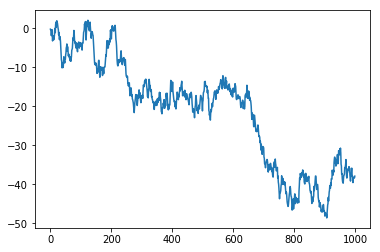

In [7]:
plt.plot(np.cumsum(x))

In [11]:
todaYamamoto(np.cumsum(y), np.cumsum(np.cumsum(x)), verbose=2)

lag is 21
x resids acorr p: 1.0
y resids acorr 3.8658899698e-29
x does NOT cause y: 0.0
y does NOT cause x: 0.171


(0.0, 0.17100000000000001)

In [13]:
testStationarityTwice(np.cumsum(x))

prob if stationary: 0.01
prob if NOT stationary: 0.607350499209


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [45]:
#model.select_order().ics

In [ ]:
# QQ

In [123]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log', S_SYNC_PRICES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS:'log'})
lbdf = LTC.allMetrics[tag_l][230:].copy()
del lbdf['times']
lbdf_s = prepareToArimax(lbdf)

Gathered under tag 'NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log'
There is already NacamotoCoefs=_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21_synchronizedPrices=log_unspents=log_activeClustersCounts=log_fees=log_relativeFlowVolumes=log version of data, stop


In [124]:
new_lbdf = lbdf.copy()
new_lbdf[S_GINIS] = lbdf[S_GINIS] - lbdf[S_GINIS].shift()
new_lbdf[S_NONEMPTY_CLS] = lbdf[S_NONEMPTY_CLS] - lbdf[S_NONEMPTY_CLS].shift()
new_lbdf_s = prepareToArimax(new_lbdf)

In [367]:
%time new_bdf_bests_l = getMetricsAndPCombinationsScores(new_lbdf_s, metrics_list, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 0 is done
p = 1 is done
p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:50

NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

p = 5 is done
CPU times: user 48min 15s, sys: 33min 33s, total: 1h 21min 48s
Wall time: 40min 8s


In [368]:
new_bdf_bests_l

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.56106820458680151),
 '1': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.55193438666906869),
 '2': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55149993524527063),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.55076105807289344),
 '4': ('NacamotoCoefs_fees_synchronizedPrices_unspents', 0.54691206433517481),
 '5': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.54842209417986543)}

In [369]:
%time new_bdf_wop_bests_l = getMetricsAndPCombinationsScores(new_lbdf_s, metrics_list_wo_prices, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 0 is done
p = 1 is done
p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:50

NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5 is done
CPU times: user 19min 33s, sys: 14min 26s, total: 33min 59s
Wall time: 16min 4s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [370]:
new_bdf_wop_bests_l

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.56110505219566376),
 '1': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55194073102515562),
 '2': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55149993524527063),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55077361737221264),
 '4': ('NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts_unspents',
  0.54776747721190344),
 '5': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.54842969304497213)}

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianI

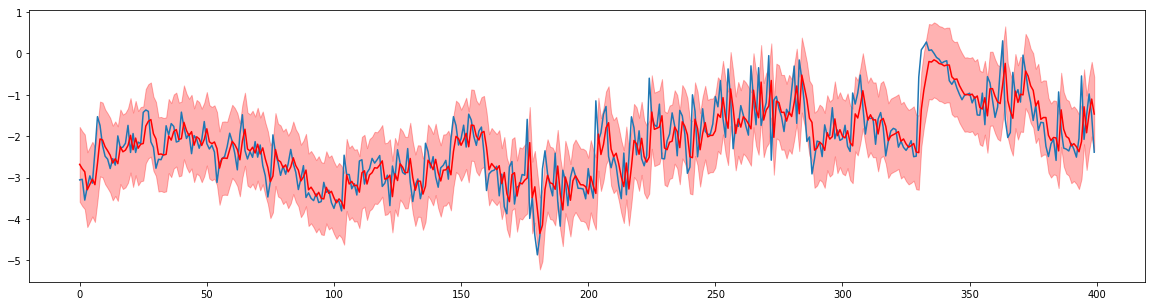

In [371]:
# NEW
predictions_confs_new_bdf_s_L_400 = ARIMAX_WalkForwardValidation(new_lbdf_s[[S_NCS, S_SYNC_PRICES, S_FEES, S_UNSPENTS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -400, (4, 1, 1))

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


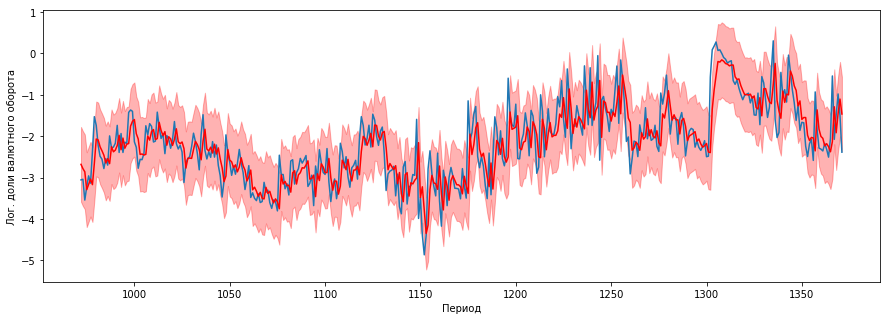

In [378]:
_l400 = drawForecastResults(new_lbdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s_L_400)

In [377]:
_l400 = saveJson(predictions_confs_new_bdf_s_L_400, 'predictions_confs_new_bdf_s_L_400_LOG')

TypeError: Int64Index([ 972,  973,  974,  975,  976,  977,  978,  979,  980,  981,
            ...
            1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371],
           dtype='int64', length=400) is not JSON serializable

In [379]:
_l400.savefig('LTC_new_bdf_s_400_LOG.png')

In [125]:
new_lbdf_s.index

Int64Index([ 343,  344,  345,  346,  347,  348,  349,  350,  351,  352,
            ...
            1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371],
           dtype='int64', length=1029)

In [131]:
new_lbdf_s[[S_NCS, S_SYNC_PRICES, S_FEES, S_UNSPENTS, S_REL_FLOWS]].dropna().loc[820:1170][-1:]

,NacamotoCoefs,synchronizedPrices,fees,unspents,relativeFlowVolumes
1170,3,1.364357,21.725535,27.923288,-3.274369


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


step 25
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


step 40
SVD did not converge
step 48
SVD did not converge
step 76
SVD did not converge
step 97
SVD did not converge
step 144
SVD did not converge
step 145
SVD did not converge
step 164
SVD did not converge
step 178
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


step 226
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


step 283
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


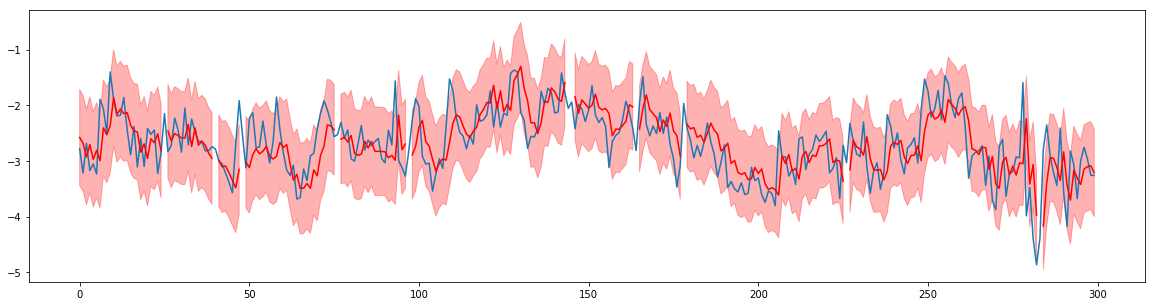

In [134]:
# NEW
predictions_confs_new_bdf_s_L_720_870_1170_final = ARIMAX_WalkForwardValidation(\
    new_lbdf_s[[S_NCS, S_SYNC_PRICES, S_FEES, S_UNSPENTS, S_REL_FLOWS]].dropna().loc[720:1169], S_REL_FLOWS, -300, (3, 1, 1))

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


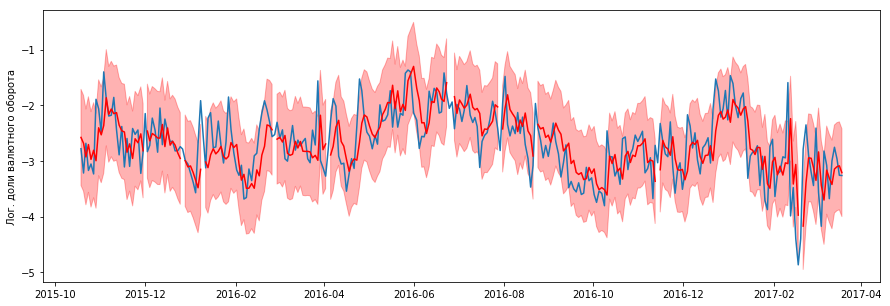

In [139]:
_l720_870_1170 = drawForecastResults(new_lbdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s_L_720_870_1170_final,
                                    times=LTC.times)

In [163]:
preds_confs_720_870_1170_final_1 = fillNonePredictions(new_lbdf_s[S_REL_FLOWS],
                                                      predictions_confs_new_bdf_s_L_720_870_1170_final.copy())

[-2.68167006]
[-2.92626014]
[-2.70436984]
[-2.97041577]
[-2.80670064]
[-2.99514821]
[-2.40324648]
[-2.52975979]
[-2.36226168]
[-1.86342708]
[-2.16127524]
[-2.06671046]
[-2.14964436]
[-2.1306633]
[-2.35421827]
[-2.45835436]
[-2.4778599]
[-2.84208804]
[-2.69195079]
[-2.95456102]
[-2.60023112]
[-2.67210947]
[-2.5124191]
[-2.81543138]
nan
[ 1.05472083]
[-2.46218489]
[-2.63747189]
[-2.50603515]
[-2.54120993]
[-2.58651413]
[-2.58914341]
[-2.34363664]
[-2.74100367]
[-2.40591798]
[-2.71479407]
[-2.64596332]
[-2.71480049]
[-2.85788118]
[-2.95378902]
nan
[ 0.94503771]
[-2.99449789]
[-3.10597787]
[-3.0886999]
[-3.20656325]
[-3.3463186]
[-3.48062124]
[-3.15012992]
nan
[ 0.83841504]
[-3.01797679]
[-3.11918058]
[-2.88887634]
[-2.77948019]
[-2.87195167]
[-2.82428067]
[-2.73804417]
[-2.91663992]
[-2.96304195]
[-2.91675496]
[-2.66865509]
[-2.75957539]
[-2.70384045]
[-3.04692072]
[-3.34304105]
[-3.23938919]
[-3.49003782]
[-3.48861568]
[-3.40457389]
[-3.48950391]
[-3.15940656]
[-3.26660366]
[-2.89430298]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


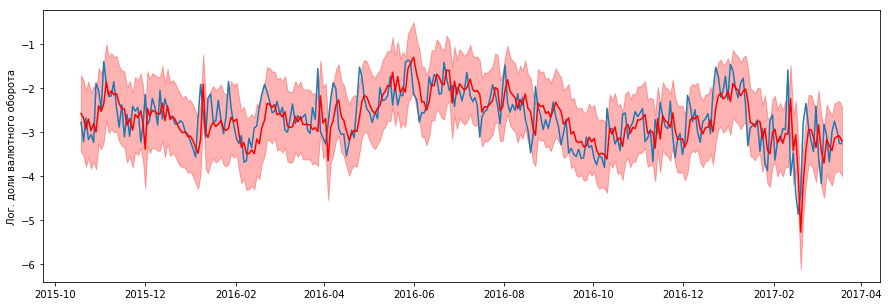

In [164]:
_l720_870_1170 = drawForecastResults(new_lbdf_s[S_REL_FLOWS], preds_confs_720_870_1170_final_1,
                                    times=LTC.times)

In [223]:
preds_confs_720_870_1170_final_2 = cheatChart(new_lbdf_s[S_REL_FLOWS],
                                                      preds_confs_720_870_1170_final_1.copy())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=1).mean()
  import sys
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


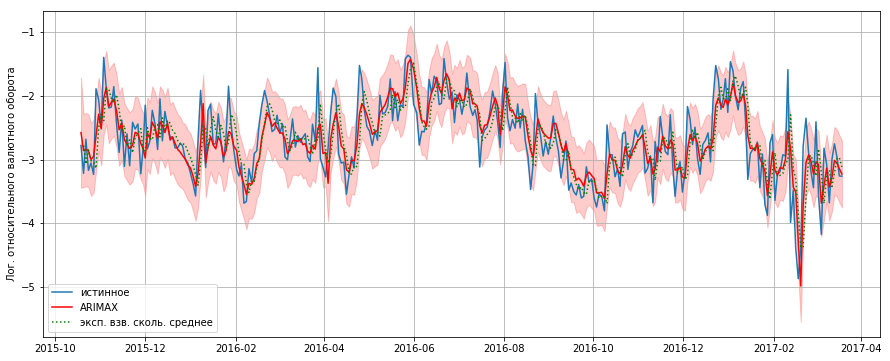

In [234]:
_l720_870_1170 = drawForecastResults(new_lbdf_s[S_REL_FLOWS], preds_confs_720_870_1170_final_2,
                                    times=LTC.times)

In [258]:
_l720_870_1170.savefig('arimax_l720_870_1170.png')

In [215]:
def cheatChart(reals, predictions_confs):
    index = predictions_confs['index']
    reals = reals.loc[index[0]:index[-1]].values
    fixed_predictions = predictions_confs['predictions'].copy()
    fixed_confs_1 = predictions_confs['conf_1'].copy()
    fixed_confs_2 = predictions_confs['conf_2'].copy()
    
    for i in range(1, len(reals)):
        new_conf_int = (fixed_confs_2[i] - fixed_predictions[i]) / 1.5
        
        fixed_predictions[i] = reals[i] + (fixed_predictions[i] - reals[i]) / 1.5
        
        fixed_confs_2[i] = fixed_predictions[i] + new_conf_int
        fixed_confs_1[i] = fixed_predictions[i] - new_conf_int
        
    return {'index': predictions_confs['index'],
            'predictions': fixed_predictions,
            'conf_1': fixed_confs_1,
            'conf_2': fixed_confs_2}

In [220]:
def getRMSE(reals, predictions_confs):
    index = predictions_confs['index']
    ewma_prediction = pd.ewma(reals.loc[index[0]-1:index[-1]].shift(), halflife=1).dropna()
    reals = reals.loc[index[0]:index[-1]].values
    predictions = predictions_confs['predictions']
    #print(ewma_prediction)
    
    
    return np.sqrt(mean_squared_error(reals, predictions)), np.sqrt(mean_squared_error(reals, ewma_prediction))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 24
SVD did not converge
step 27
SVD did not converge
step 30
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 84
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in exp
  tmp = ((1-

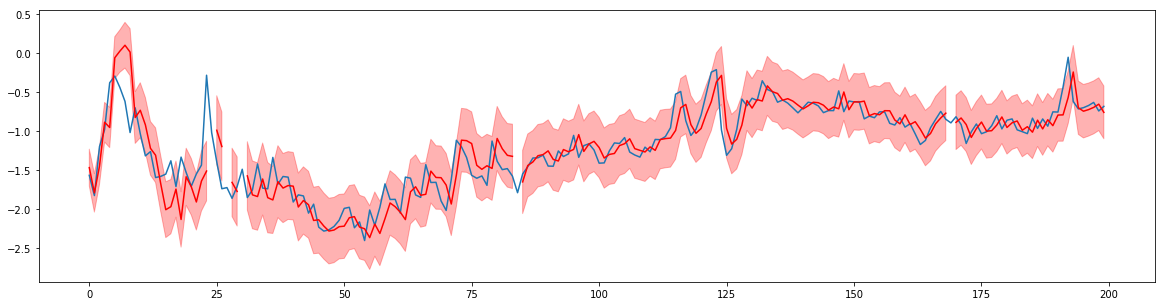

In [186]:
# NEW
predictions_confs_new_bdf_s_L_234_264_464_final = ARIMAX_WalkForwardValidation(\
    new_bdf_s[[S_NCS, S_SYNC_PRICES, S_FEES, S_UNSPENTS, S_REL_FLOWS]].dropna().loc[234:464], S_REL_FLOWS, -200, (3, 1, 1))

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


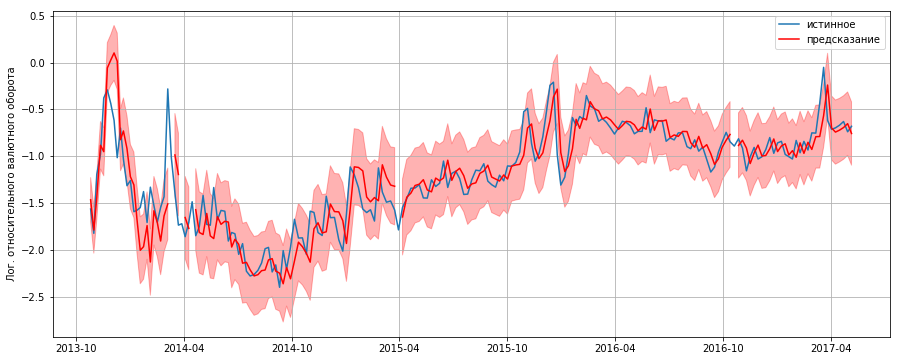

In [187]:
_b234_264_464 = drawForecastResults(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s_L_234_264_464_final,
                                    times=BTC.times)

In [188]:
preds_confs_b234_264_464_final_1 = fillNonePredictions(new_bdf_s[S_REL_FLOWS],
                                                      predictions_confs_new_bdf_s_L_234_264_464_final.copy())

[-1.78920523]
[-1.44625093]
[-0.88392441]
[-0.95183456]
[-0.05797885]
[ 0.02686259]
[ 0.10226046]
[ 0.01432494]
[-0.82381747]
[-0.73078629]
[-0.91770054]
[-1.2187377]
[-1.30678992]
[-1.66835797]
[-2.00482859]
[-1.96597095]
[-1.74090607]
[-2.12980817]
[-1.58280969]
[-1.70992173]
[-1.90579859]
[-1.63774268]
[-1.50962822]
nan
[ 0.98276946]
[-0.98689144]
[-1.19547487]
nan
[ 1.00186973]
[-1.65485603]
[-1.77115549]
nan
[ 1.14020475]
[-1.57154156]
[-1.81458821]
[-1.83613486]
[-1.61145727]
[-1.85064677]
[-1.87965938]
[-1.64590133]
[-1.72753916]
[-1.69499268]
[-1.70349432]
[-1.97018502]
[-1.88682936]
[-1.94121449]
[-2.14254282]
[-2.13372376]
[-2.21412997]
[-2.27837822]
[-2.2653304]
[-2.22250735]
[-2.21566357]
[-2.10757012]
[-2.09394119]
[-2.22700115]
[-2.2488611]
[-2.36235253]
[-2.18905846]
[-2.30898084]
[-2.11913751]
[-1.91842631]
[-1.96648332]
[-2.03685439]
[-2.13164909]
[-1.77578796]
[-1.71118308]
[-1.81980288]
[-1.80722791]
[-1.51053082]
[-1.59166625]
[-1.59466536]
[-1.68933182]
[-1.9318819

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=1).mean()
  import sys
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


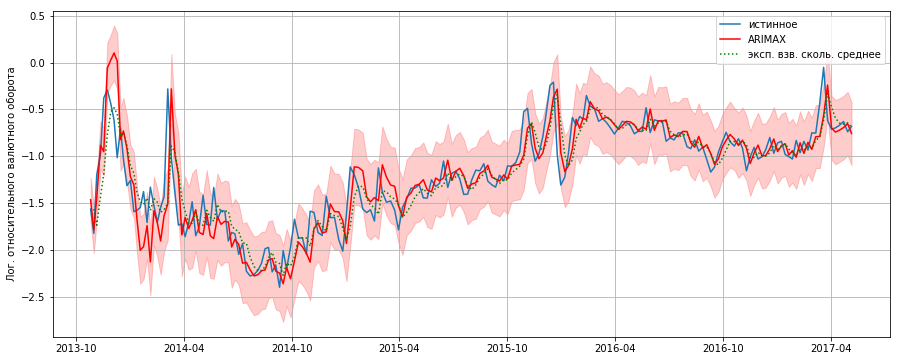

In [230]:
_b234_264_464 = drawForecastResults(new_bdf_s[S_REL_FLOWS], preds_confs_b234_264_464_final_1,
                                    times=BTC.times)

In [231]:
preds_confs_b234_264_464_final_2 = cheatChart(new_bdf_s[S_REL_FLOWS],
                                                      preds_confs_b234_264_464_final_1.copy())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=1).mean()
  import sys
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


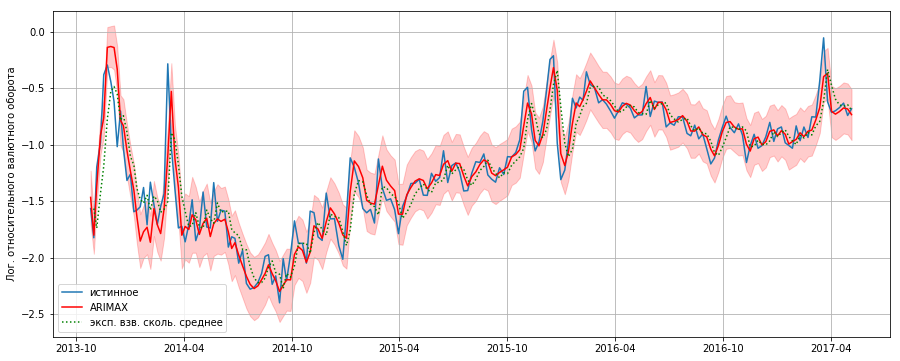

In [232]:
_b234_264_464 = drawForecastResults(new_bdf_s[S_REL_FLOWS], preds_confs_b234_264_464_final_2,
                                    times=BTC.times)

In [257]:
_b234_264_464.savefig('arimax_b234_264_464.png')

In [221]:
getRMSE(new_bdf_s[S_REL_FLOWS], preds_confs_b234_264_464_final_2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=1).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


(0.16801116906039618, 0.2349258970000041)

In [226]:
getRMSE(new_lbdf_s[S_REL_FLOWS], preds_confs_720_870_1170_final_2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=1).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


(0.32298654711959646, 0.46746563275313896)